<a href="https://colab.research.google.com/github/lambhua/Machine-Learning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **RANDOM FOREST**

Random Forest is a widely-used machine learning algorithm developed by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. It handles both classification and regression problems

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks

It uses **Bagging Ensemble technique** .It creates a different training subset from sample training data with replacement & the final output is based on majority voting

**HYPERPARAMETERS**

n_estimators: Number of trees the algorithm builds before averaging the predictions.

max_features: Maximum number of features random forest considers splitting a node.

mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.

criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)
max_leaf_nodes: Maximum leaf nodes in each tree

In [9]:
#iMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

**Import the dataset.**

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data['target'].value_counts() # 1 denotes heart disease and 0 with no heart disease

1    526
0    499
Name: target, dtype: int64

**Putting Feature Variable to X and Target variable to y.**

In [7]:
# Putting feature variable to X
X = data.drop('target',axis=1)
# Putting response variable to y
y = data['target']

**Train-Test-Split is performed**

In [8]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((717, 13), (308, 13))

**Fit RandomForestClassifier on data.**

In [11]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [12]:
# checking the oob score
classifier_rf.oob_score_

0.9121338912133892

**Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.**

In [13]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [14]:
grid_search.best_score_


0.9121042830540037

In [15]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

From hyperparameter tuning, we can fetch the best estimator, as shown. The best set of parameters identified was max_depth=10, min_samples_leaf=5,n_estimators=200

In [16]:
grid_search.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

**visualize**

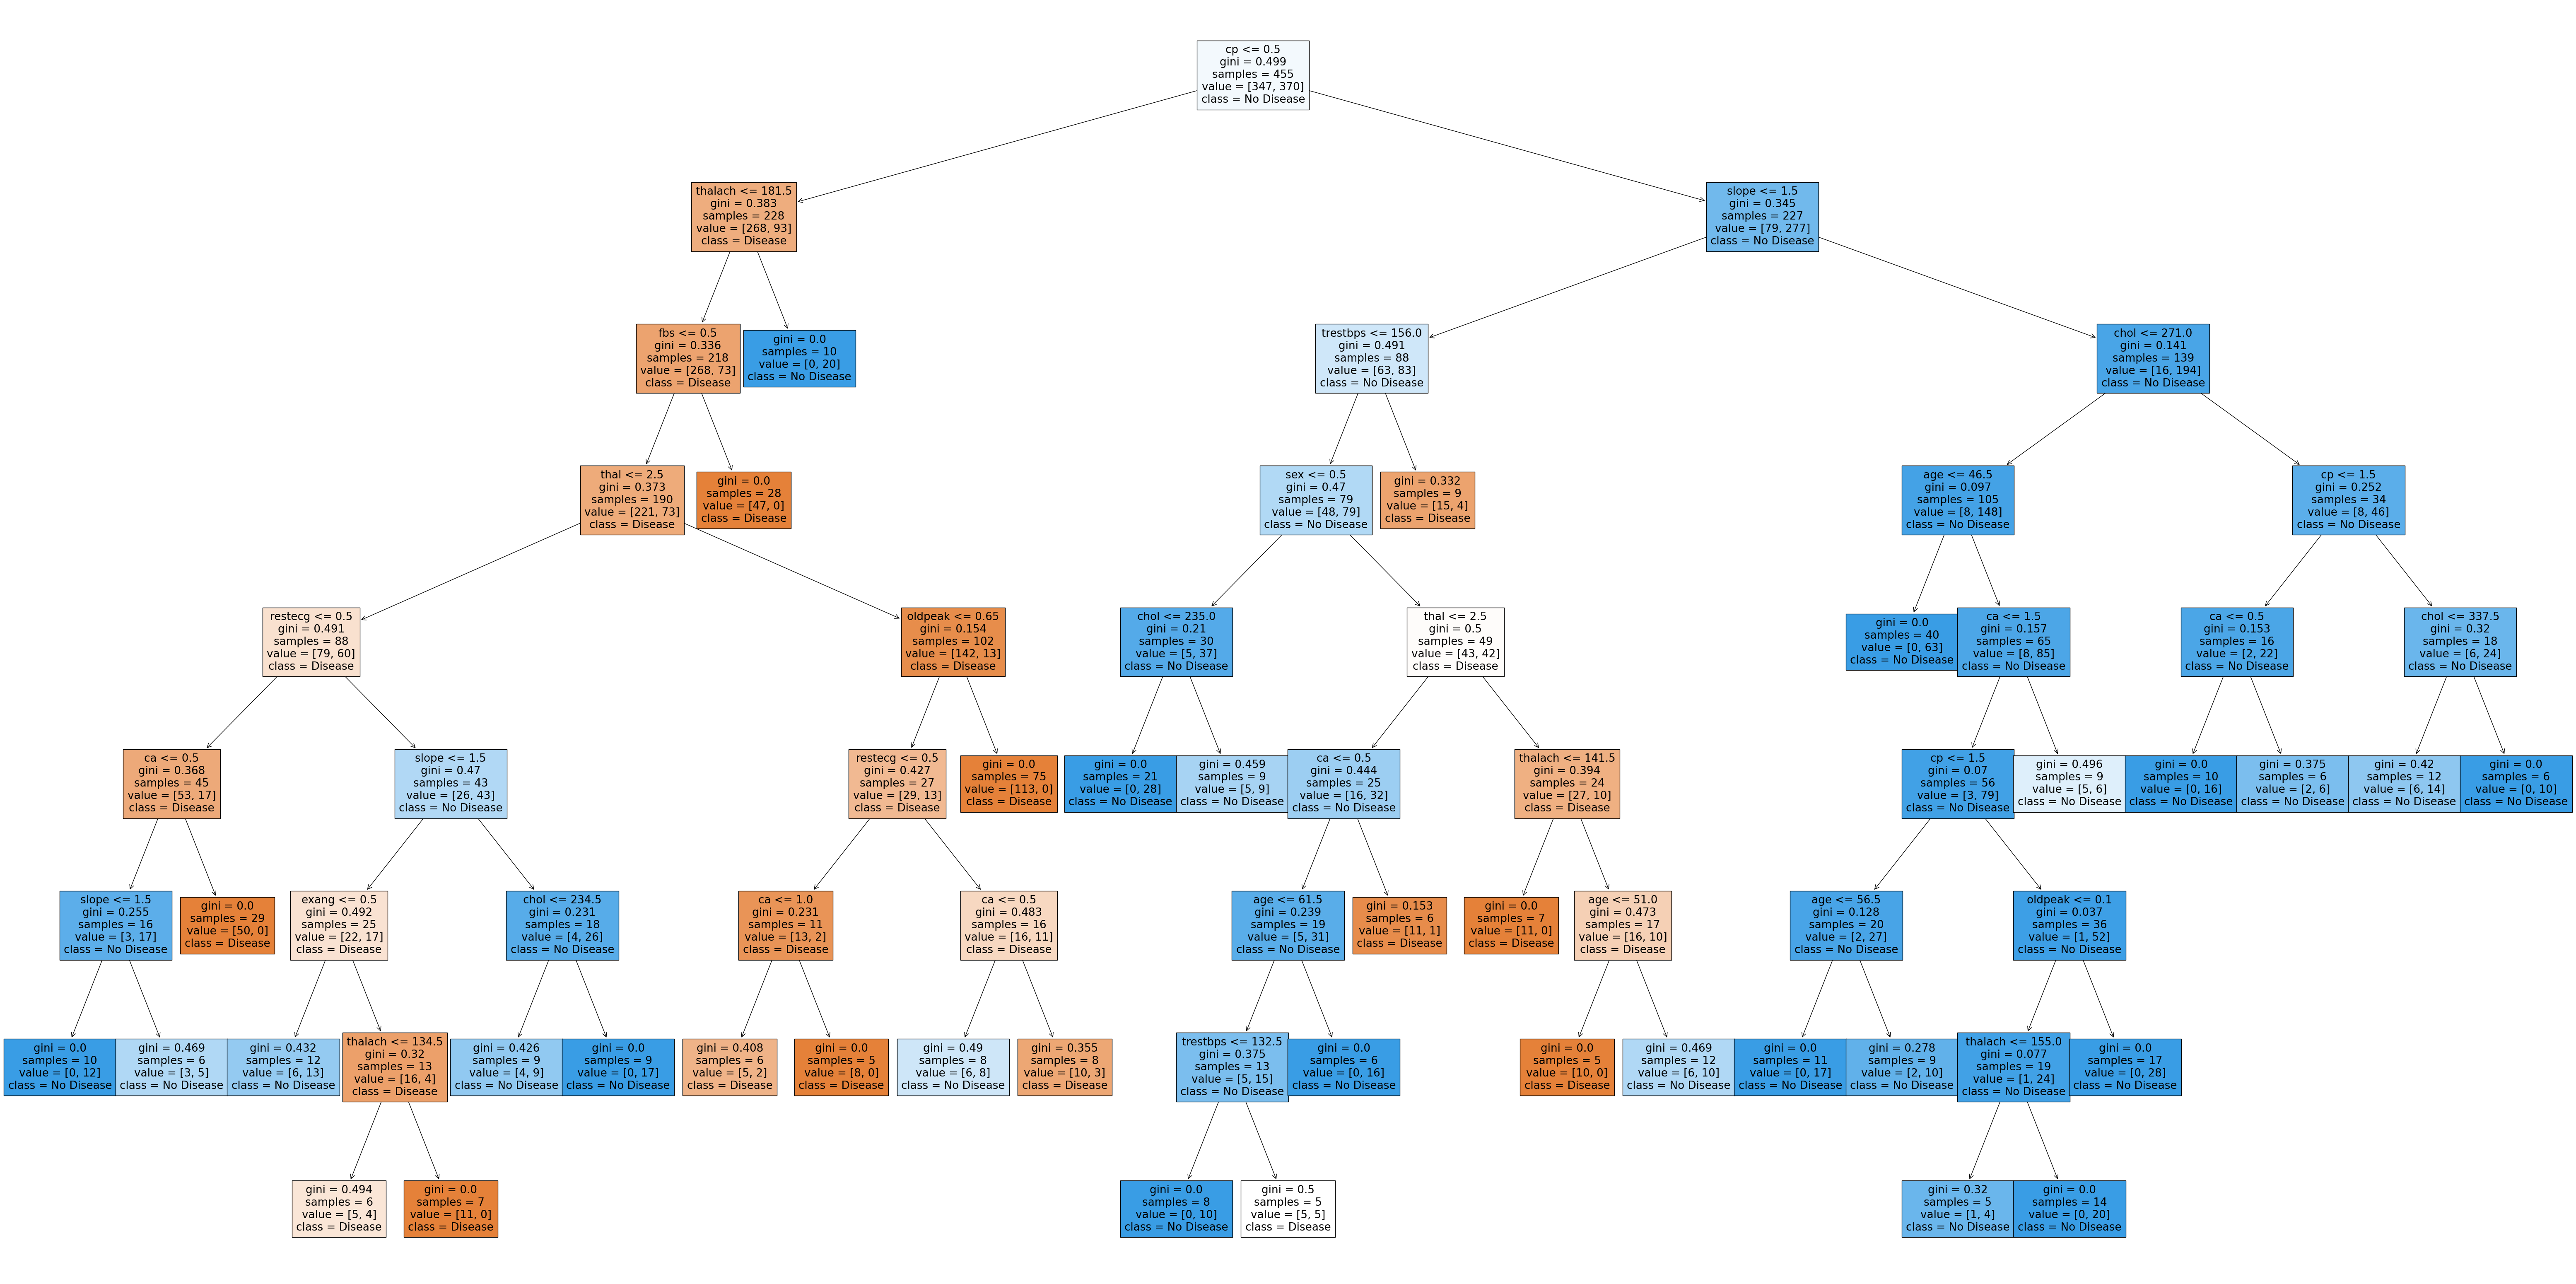

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

**Now let’s sort the data with the help of feature importance**

In [18]:
rf_best.feature_importances_

array([0.06694462, 0.02859054, 0.16355485, 0.0511375 , 0.05995325,
       0.00385975, 0.01116668, 0.10976216, 0.05001023, 0.11788114,
       0.04864435, 0.13965387, 0.14884106])

In [19]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,cp,0.163555
12,thal,0.148841
11,ca,0.139654
9,oldpeak,0.117881
7,thalach,0.109762
0,age,0.066945
4,chol,0.059953
3,trestbps,0.051137
8,exang,0.050010
10,slope,0.048644


**Advantages and Disadvantages of Random Forest Algorithm**

**Advantages**

It can be used in classification and regression problems.

It solves the problem of overfitting as output is based on majority voting or averaging.

It performs well even if the data contains null/missing values.

Each decision tree created is independent of the other; thus, it shows the property of parallelization.

It is highly stable as the average answers given by a large number of trees are taken.

It maintains diversity as all the attributes are not considered while making each decision tree though it is not true in all cases.

It is immune to the curse of dimensionality. Since each tree does not consider all the attributes, feature space is reduced.

We don’t have to segregate data into train and test as there will always be 30% of the data, which is not seen by the decision tree made out of bootstrap.

**Disadvantages**

Random forest is highly complex compared to decision trees, where decisions can be made by following the path of the tree.

Training time is more than other models due to its complexity. Whenever it has to make a prediction, each decision tree has to generate output for the given